## **Ujian Praktik Natural Language Processing**

Pada ujian praktik ini digunakan dataset twitter emotion dengan tujuan untuk melakukan klasifikasi tweet atau paragraph berdasarkan label emosinya. Labelnya sendiri terdiri dari happy, sadness, anger, fear, dan love. Untuk model yang digunakan saya menggunakan metode pendekatan machine learning dan deep learning yang kemudian akan dibandingkan performa keduanya. Hasil model yang paling baik kemudian akan dibuat deployment sederhananya.

**Zaki Maulana Rabbani**

**Kelas Predict**

# Data Acquisition

Pada proses data acquisition ini dataset akan di import kedalam program. Pertama kita perlu untuk mengupload dataset tersebut ke google drive kemudian program collab ini di mount setelah itu kita dapat mengimport dataset menggunakan library pandas. Dapat dilihat bahwa dataset yang digunakan menggunakan label dengan tipe data string sementara untuk membuat model kita perlu mengubahnya terlebih dahulu menjadi tipe data integer sehingga dapat dilihat label marah akan menjadi 0, senang menjadi 1, sedih menjadi 2, takut menjadi 3, dan cinta menjadi 4. 

In [1]:
#proses mount google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# melakukan import library yang akan digunakan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pickle

%matplotlib inline

In [3]:
#dataset diimport menggunakan pandas dan dimunculkan 15 baris data pertama untuk melihat label dan isi datasetnya

data = pd.read_csv('/content/drive/MyDrive/Ujian Praktik NLP/Indonesian-Twitter-Emotion-Dataset-master/Twitter_Emotion_Dataset.csv')
data.head(15)

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."
5,anger,"Dari sekian banyak thread yang aku baca, threa..."
6,happy,Sharing sama temen tuh emg guna bgt. Disaat lu...
7,sadness,Orang lain kalau pake ponco itu buat jas hujan...
8,anger,"Contoh mereka yg gemar menyudutkan, teriak pal..."
9,sadness,Pulang udah H-4 lebaran dilema sekali. Seperti...


In [4]:
#mengubah label dari string menjadi integer

data['label']= data['label'].map({'anger':0, 'happy':1, 'sadness':2, 'fear':3, 'love':4}).astype(int)

In [5]:
data.head(10)

,label,tweet
0,0,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,0,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,1,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,0,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,1,"Sharing pengalaman aja, kemarin jam 18.00 bata..."
5,0,"Dari sekian banyak thread yang aku baca, threa..."
6,1,Sharing sama temen tuh emg guna bgt. Disaat lu...
7,2,Orang lain kalau pake ponco itu buat jas hujan...
8,0,"Contoh mereka yg gemar menyudutkan, teriak pal..."
9,2,Pulang udah H-4 lebaran dilema sekali. Seperti...


# Data Visualization

Pada bagian ini saya lakukan visualisasi data mengenai jumlah tweet pada setiap label pada dataset ini. Visualisasi dilakukan baik dengan text maupun memanfaatkan bar chart.

In [6]:
#visualisasi data berupa print jumlah tweet untuk setiap labelnya

print('Total Jumlah Tweet:', data.shape[0], 'data\n')
print('terdiri dari (label):')
print('[0] untuk Tweet Marah\t\t:', data[data.label == 0].shape[0], 'data')
print('[1] untuk Tweet Senang\t\t:', data[data.label == 1].shape[0], 'data')
print('[2] untuk Tweet Takut\t\t:', data[data.label == 2].shape[0], 'data')
print('[3] untuk Tweet Cinta\t\t:', data[data.label == 3].shape[0], 'data')
print('[4] untuk Tweet Sedih\t\t:', data[data.label == 4].shape[0], 'data')

Total Jumlah Tweet: 4401 data

terdiri dari (label):
[0] untuk Tweet Marah		: 1101 data
[1] untuk Tweet Senang		: 1017 data
[2] untuk Tweet Takut		: 997 data
[3] untuk Tweet Cinta		: 649 data
[4] untuk Tweet Sedih		: 637 data


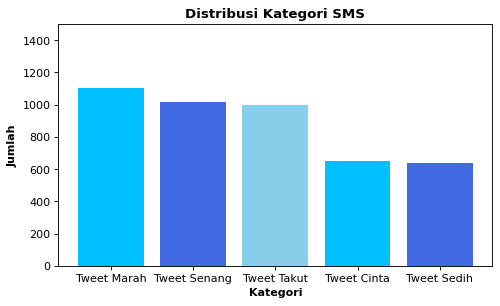

In [7]:
#visualisasi data untuk melihat penyebaran jumlah tweet pada setiap labelnya pada bentuk bar chart

height = data['label'].value_counts()
labels = ('Tweet Marah', 'Tweet Senang', 'Tweet Takut', 'Tweet Cinta', 'Tweet Sedih')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,1500)
plt.title('Distribusi Kategori SMS', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah', fontweight='bold')
plt.bar(y_pos, height, color=['deepskyblue', 'royalblue', 'skyblue'])
plt.xticks(y_pos, labels)
plt.show()

# Machine Learning (sklearn)

Pada bagian akan digunakan pendekatan machine learning dengan sklearn dengan beberapa metode klasifikasi dengan tujuan untuk melakukan klasifikasi tweet. Metode klasifikasi yang digunakan adalah Multinomial NB, Gausian NB, KNN, dan Logistic Regression.

## Text Preprocessing

Selanjutnya dilakukan text preprocessing, tujuannya adalah agar text memiliki bentuk yang sama sebelum akhirnya diolah menggunakan metode machine learning. Tahap preprocessing yang dilakukan terdiri dari case folding untuk membuat text menjadi huruf kecil semua sehingga text bisa lebih sederhana, kemudian dilakukan word normalization dan juga menghilangkan singkatan agar informasi pada text menjadi lebih jelas, selanjutnya filtering untuk menghilangkan stopword agar text menjadi lebih sederhana, dan terakhir dilakukan stemming untuk mengembalikan setiap kata menjadi ke bentuk aslinya. Seluruh proses preprocessing ini dilakukan pada dataset yang hasilnya akan membentuk kolom baru dengan nama clean_text.

### Case Folding

In [8]:
# fungsi untuk case folding (lowering text)
import re

def casefolding(text):
    text = text.lower()                               # mengubah text menjadi lower case
    text = re.sub(r'https?://\S+|www\.\S+', '', text) # menghapus URL
    text = re.sub(r'[-+]?[0-9]+', '', text)           # menghapus angka
    text = re.sub(r'[^\w\s]','', text)                # menghapus karakter tanda baca
    text = text.strip()
    return text

In [9]:
# melakukan case folding pada salah satu tweet untuk contoh

raw_sample = data['tweet'].iloc[1]
case_folding = casefolding(raw_sample)

print('Raw data\t: ', raw_sample)
print('\n\nCase folding\t: ', case_folding)

Raw data	:  Sesama cewe lho (kayaknya), harusnya bisa lebih rasain lah yang harus sibuk jaga diri, rasain sakitnya haid, dan paniknya pulang malem sendirian. Gimana orang asing? Wajarlah banyak korban yang takut curhat, bukan dibela malah dihujat.


Case folding	:  sesama cewe lho kayaknya harusnya bisa lebih rasain lah yang harus sibuk jaga diri rasain sakitnya haid dan paniknya pulang malem sendirian gimana orang asing wajarlah banyak korban yang takut curhat bukan dibela malah dihujat


### Word Normalization

In [10]:
# normalisasi kata untuk slang
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

--2022-10-06 13:18:31--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80969 (79K) [text/plain]
Saving to: ‘key_norm.csv’

key_norm.csv        100%[===================>]  79.07K  --.-KB/s    in 0.001s  

2022-10-06 13:18:31 (77.3 MB/s) - ‘key_norm.csv’ saved [80969/80969]



In [11]:
#pemanggilang kamus kata untuk slang

key_norm = pd.read_csv('key_norm.csv')
print(key_norm.head())

key_norm.shape

   _id      singkat       hasil
0    1         abis       habis
1    2       accent     tekanan
2    3       accept      terima
3    4     accident  kecelakaan
4    5  achievement    prestasi


(3720, 3)

In [12]:
key_norm.head()

,_id,singkat,hasil
0,1,abis,habis
1,2,accent,tekanan
2,3,accept,terima
3,4,accident,kecelakaan
4,5,achievement,prestasi


In [13]:
#fungsi normalisasi text slang

def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

### Singkatan

In [14]:
# normalisasi kata untuk singkatan
# kamus singkatan di import

key_singkat = pd.read_csv('/content/drive/MyDrive/Ujian Praktik NLP/Indonesian-Twitter-Emotion-Dataset-master/kamus_singkatan.csv')
key_singkat.shape

(1309, 2)

In [15]:
key_singkat.head()

,singkatan,asli
0,aamiin,amin
1,adek,adik
2,adlh,adalah
3,aer,air
4,aiskrim,es krim


In [16]:
# fungsi untuk menghapus singkatan

def text_singkatan(text):
  text = ' '.join([key_singkat[key_singkat['singkatan'] == word]['asli'].values[0] if (key_singkat['singkatan'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

In [17]:
# melakukan pengahpusan singkatan pada salah satu tweet untuk contoh

raw_sample = data['tweet'].iloc[0]
teks_singkatan = text_singkatan(raw_sample)

print('Raw data\t: ', raw_sample)
print('\n\nJadi\t: ', teks_singkatan)

Raw data	:  Soal jln Jatibaru,polisi tdk bs GERTAK gubernur .Emangny polisi tdk ikut pmbhasan? Jgn berpolitik. Pengaturan wilayah,hak gubernur. Persoalan Tn Abang soal turun temurun.Pelik.Perlu kesabaran. [USERNAME] [USERNAME] [URL]


Jadi	:  soal jalan  jatibaru,polisi tidak  bisa  gertak gubernur .emangny polisi tidak  ikut pmbhasan? jgn berpolitik. pengaturan wilayah,hak gubernur. persoalan tn abang soal turun temurun.pelik.perlu kesabaran. [username] [username] [url]


### Filtering (stopwords)

In [18]:
# proses download kamus stopword dari nltk

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
# stopword bahasa indonesia dipanggil

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [20]:
# jumlah kata stopword pada kamus

len(stopwords_ind)

758

In [21]:
# fungsi untuk menghilangkan stopword

def remove_stop_words(text):
    clean_words = []
    text = text.split()
    for word in text:
        if word not in stopwords_ind:
            clean_words.append(word)
    return " ".join(clean_words)

In [22]:
# melakukan penghilangan stopword pada salah satu tweet untuk contoh

raw_sample = data['tweet'].iloc[5]
case_folding = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)

print('Raw data\t: ', raw_sample)
print('\n\nCase folding\t: ', case_folding)
print('\n\nStopword removal\t: ', stopword_removal)

Raw data	:  Dari sekian banyak thread yang aku baca, thread ini paling aneh sih dalam penulisan. Sumpah aneh bgt, mau ngatain "lebay" aja segala bikin thread hadeh. Aku juga ga jago nulis, tapi tulisan aku ga seberantakan thread mbaknya.


Case folding	:  dari sekian banyak thread yang aku baca thread ini paling aneh sih dalam penulisan sumpah aneh bgt mau ngatain lebay aja segala bikin thread hadeh aku juga ga jago nulis tapi tulisan aku ga seberantakan thread mbaknya


Stopword removal	:  sekian thread baca thread aneh sih penulisan sumpah aneh bgt ngatain lebay aja bikin thread hadeh ga jago nulis tulisan ga seberantakan thread mbaknya


### Stemming

In [25]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
# import library untuk stemming dari sastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

# fungsi untuk stemming bahasa Indonesia
def stemming(text):
    text = stemmer.stem(text)
    return text

In [27]:
# melakukan stemming pada salah satu tweet untuk contoh

raw_sample       = data['tweet'].iloc[5]
case_folding     = casefolding(raw_sample)
stopword_removal = remove_stop_words(case_folding)
text_stemming    = stemming(stopword_removal)

print('Raw data\t: ', raw_sample)
print('\n\nCase folding\t: ', case_folding)
print('\n\nStopword removal\t: ', stopword_removal)
print('\n\nStemming\t: ', text_stemming)

Raw data	:  Dari sekian banyak thread yang aku baca, thread ini paling aneh sih dalam penulisan. Sumpah aneh bgt, mau ngatain "lebay" aja segala bikin thread hadeh. Aku juga ga jago nulis, tapi tulisan aku ga seberantakan thread mbaknya.


Case folding	:  dari sekian banyak thread yang aku baca thread ini paling aneh sih dalam penulisan sumpah aneh bgt mau ngatain lebay aja segala bikin thread hadeh aku juga ga jago nulis tapi tulisan aku ga seberantakan thread mbaknya


Stopword removal	:  sekian thread baca thread aneh sih penulisan sumpah aneh bgt ngatain lebay aja bikin thread hadeh ga jago nulis tulisan ga seberantakan thread mbaknya


Stemming	:  sekian thread baca thread aneh sih tulis sumpah aneh bgt ngatain lebay aja bikin thread hadeh ga jago nulis tulis ga beranta thread mbak


### Text Preprocessing Pipeline

In [28]:
# fungsi untuk menggabungkan seluruh langkah text preprocessing
def text_preprocessing_process(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = text_singkatan(text)
  text = remove_stop_words(text)
  text = stemming(text)
  return text

In [29]:
#Install library swifter untuk meningkatkan kecepatan proses pandas

!pip install swifter 
import swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 830 kB 18.1 MB/s 
     |████████████████████████████████| 281 kB 59.1 MB/s 
     |████████████████████████████████| 1.6 MB 57.1 MB/s 
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16322 sha256=b9373152311127c745baf1e27b15b3cc3de824bdd3612b9371158a734a056577
  Stored in directory: /root/.cache/pip/wheels/29/a7/0e/3a8f17ac69d759e1e93647114bc9bdc95957e5b0cbfd405205
Successfully built swifter
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [30]:
# proses seluruh preprocessing untuk seluruh dataset

%%time
data['clean_article'] = data['tweet'].apply(text_preprocessing_process)

CPU times: user 23min 17s, sys: 7.08 s, total: 23min 24s
Wall time: 23min 29s


In [31]:
data

,label,tweet,clean_article
0,0,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",jalan jatibarupolisi gertak gubernur emangny p...
1,0,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",cewek lho kayak rasain sibuk jaga rasain sakit...
2,1,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,kepingin gudeg mbarek bu hj amad foto google s...
3,0,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",jalan jatibarubagian wilayah tn abangpengatura...
4,1,"Sharing pengalaman aja, kemarin jam 18.00 bata...",sharing alam kemarin jam batalin tiket stasiun...
...,...,...,...
4396,4,"Tahukah kamu, bahwa saat itu papa memejamkan m...",tahu papa mejam mata tahan gejolak batin papa ...
4397,3,Sulitnya menetapkan Calon Wapresnya Jokowi di ...,sulit tetap calon wapresnya jokowi pilpres sal...
4398,0,"5. masa depannya nggak jelas. lha iya, gimana ...",depan lha iya coba lulus seni bisa tari kerja ...
4399,1,[USERNAME] dulu beneran ada mahasiswa Teknik U...,username mahasiswa teknik ui tembak pacar pas ...


In [32]:
# data yang telah melalui text preprocessing disimpan pada file csv
data.to_csv('clean_data.csv')

## Feature Engineering

Pada bagian ini dilakukan fitur extraction dan juga fitur selection untuk menghasilkan fitur-fitur terbaik dari dataset yang ada. Fitur extraction yang digunakan adalah TF-IDF dengan unigram sementara untuk fitur selection yang digunakan adalah chi-square. Fitur extraction digunakan untuk meng-esktrak setiap data sementara untuk fitur selection akan memberi nilai pada setiap fitur, semakin tinggi nilai chi-square maka bisa dikatakan bahwa fitur tersebut adalah fitur yang penting.

In [33]:
# pisahkan kolom fitur dan target

X = data['clean_article'] #fitur atau independent variable
y = data['label'] #target atau dependent variable

In [34]:
y

0       0
1       0
2       1
3       0
4       1
       ..
4396    4
4397    3
4398    0
4399    1
4400    2
Name: label, Length: 4401, dtype: int64

### Feauture Extraction

In [35]:
# import library untuk proses TF-IDF dengan ngram

from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1,1)) # digunakan unigram
tf_idf.fit(X) # TF-IDF diaplikasikan untuk variable X

TfidfVectorizer()

In [36]:
# melihat jumlah fitur pada dataset
print(len(tf_idf.get_feature_names_out()))

13512


In [37]:
# fitur yang ada di dalam corpus
print(tf_idf.get_feature_names_out())

['aa' 'aaa' 'aaaaaa' ... 'zonknya' 'zuhri' 'zulkifli']


In [38]:
# matriks jumlah token

X_tf_idf = tf_idf.transform(X).toarray()
X_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
# Melihat matriks jumlah token menggunakan TF IDF dan diletakan pada data frame

data_tf_idf = pd.DataFrame(X_tf_idf, columns=tf_idf.get_feature_names_out())
data_tf_idf

,aa,aaa,aaaaaa,aaaaaaa,aaaaaaaaa,aaaaak,aaaahhh,aaah,aaahhhh,aaamiiinnn,...,zmn,zohri,zon,zona,zonasi,zonk,zonkies,zonknya,zuhri,zulkifli
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
# matriks diletakan pada file pickle

with open('tf_idf_feature.pickle', 'wb') as output:
  pickle.dump(X_tf_idf, output)

### Feature Selection

In [41]:
# mengubah nilai data tabular tf-idf menjadi array agar dapat dijalankan pada proses seleksi fitur
X = np.array(data_tf_idf)
y = np.array(y)

In [42]:
# proses feature selection menggunakan chi-square dengan library sklearn

from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2 

# memilih 1000 fitur yang memiliki nilai chi-square terbaik
chi2_features = SelectKBest(chi2, k=1000) 
X_kbest_features = chi2_features.fit_transform(X, y) 
  
# pengurangan features 
print('Original feature number:', X.shape[1]) 
print('Reduced feature number:', X_kbest_features.shape[1]) 

Original feature number: 13512
Reduced feature number: 1000


In [43]:
# melihat  nilai chi-square dan dimasukan pada data frame
# nilai yang semakin tinggi maka semakin baik fiturnya

data_chi2 = pd.DataFrame(chi2_features.scores_, columns=['nilai'])
data_chi2

,nilai
0,1.797091
1,0.800269
2,0.954834
3,1.066704
4,1.267385
...,...
13507,0.561406
13508,0.811404
13509,1.624709
13510,0.856294


In [44]:
# menampilkan fitur beserta nilainya

feature = tf_idf.get_feature_names_out()
data_chi2['fitur'] = feature
data_chi2

,nilai,fitur
0,1.797091,aa
1,0.800269,aaa
2,0.954834,aaaaaa
3,1.066704,aaaaaaa
4,1.267385,aaaaaaaaa
...,...,...
13507,0.561406,zonk
13508,0.811404,zonkies
13509,1.624709,zonknya
13510,0.856294,zuhri


In [45]:
# fitur diurutkan dari terbaik beserta nilainya

data_chi2.sort_values(by='nilai', ascending=False)

,nilai,fitur
2153,322.075058,cinta
11853,252.920209,takut
10629,211.625760,sayang
11005,82.785247,seram
8344,68.121890,ngeri
...,...,...
1159,0.073741,be
2308,0.067541,cuek
10718,0.054633,sedap
11901,0.049942,tanggal


In [46]:
# masking pada fitur yang diseleksi
# false berarti fitur tidak terpilih dan True berarti fitur terpilih

mask = chi2_features.get_support()
mask

array([False, False, False, ..., False, False, False])

In [47]:
# menampilkan fitur-fitur terpilih berdasarkan mask atau nilai tertinggi yang sudah dikalkulasi dengan Chi-Square
new_feature = []

for bool, f in zip(mask, feature):
  if bool:
    new_feature.append(f)
  selected_feature = new_feature

selected_feature

['abar',
 'acara',
 'acc',
 'adegan',
 'adem',
 'adipati',
 'aduh',
 'agama',
 'agus',
 'aim',
 'ajar',
 'akhri',
 'akumencintamu',
 'akun',
 'al',
 'ala',
 'alami',
 'alas',
 'album',
 'alhamdulillah',
 'alhasil',
 'all',
 'allaah',
 'allah',
 'alquran',
 'aman',
 'amin',
 'amp',
 'ana',
 'anakanaknya',
 'andai',
 'aneh',
 'angan',
 'anggar',
 'anies',
 'anjay',
 'anjing',
 'anjir',
 'anniv',
 'anniversary',
 'antri',
 'anugerah',
 'anxiety',
 'apain',
 'apasih',
 'arah',
 'arguement',
 'army',
 'asa',
 'asih',
 'asik',
 'askmf',
 'asli',
 'asumsi',
 'asyik',
 'atur',
 'awet',
 'ayah',
 'ayo',
 'ayu',
 'baby',
 'baca',
 'bacot',
 'badan',
 'bagi',
 'bahagia',
 'bahagiaitu',
 'bahak',
 'bahaya',
 'baik',
 'bait',
 'balas',
 'banci',
 'bandit',
 'bandung',
 'bangga',
 'bangsat',
 'bangun',
 'banjir',
 'banteng',
 'banyak',
 'baring',
 'barokah',
 'bat',
 'baterai',
 'bau',
 'bawel',
 'bayang',
 'bayangbayangnya',
 'bayanginnya',
 'bayar',
 'bayi',
 'bca',
 'bela',
 'belai',
 'beli',
 'b

In [48]:
# melihat vocab yang dihasilkan oleh TF_IDF 

kbest_feature = {} # dictionary untuk vocab

for (k,v) in tf_idf.vocabulary_.items():   
  if k in selected_feature:                 
    kbest_feature[k] = v                  

In [49]:
# menampilkan fitur-fitur terbaik yang sudah diseleksi (k best)

data_selected_feature = pd.DataFrame(X_kbest_features, columns=selected_feature)
data_selected_feature

,abar,acara,acc,adegan,adem,adipati,aduh,agama,agus,aim,...,yaallahsmoga,yaelah,yahudi,yeorobun,yha,yoona,yoongiii,yu,yuta,zina
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# kbest diletakan pada file pickle sehingga dapat dipanggil

with open('kbest_feature.pickle', 'wb') as output:
  pickle.dump(kbest_feature, output)

## Multinomial NB


Pada model machine learning yang pertama akan digunakan model multinomial naive bayes. Model ini dapat di deklarasikan menggunakan library sklearn. Selanjutnya model di training dan dilakukan prediksi menggunakan variable X dan y. Kemudian kita evaluasi model multinomial NB melalui persen akurasi, confusion matrix, dan klasifikasi reportnya. Untuk akurasi yang lebih meyakinkan kita lakukan cross validation dengan split 10 kali. Hasil dari model ini dapat dilihat bahwa multinomial NB menghasilkan sekitar 62% akurasi pengujian.

In [51]:
# import library yang akan digunakan

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split    
from joblib import dump                                 

In [52]:
# membagi data test training dan testing berdasarkan kbest feature
# data tes akan sebesar 20% dan data training sebesar 80%

X_train, X_test, y_train, y_test = train_test_split(X_kbest_features, y, test_size=0.2, random_state=40)

In [53]:
# import model multinomial NB
algorithm_1 = MultinomialNB()               

# model ditraining dengan variabel
model_1 = algorithm_1.fit(X_train, y_train)  

# model hasil traning disimpan
dump(model_1, filename='model_1.joblib')

['model_1.joblib']

In [54]:
# model multinomial NB yang sudah dilatih kemudian diprediksi menggunakan data test

model_1_pred = model_1.predict(X_test)
model_1_pred

array([1, 1, 0, 1, 1, 0, 2, 1, 0, 0, 1, 1, 0, 2, 1, 1, 1, 4, 1, 0, 2, 0,
       0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 4, 1, 0, 0, 2,
       0, 1, 0, 4, 0, 2, 3, 1, 1, 3, 2, 0, 2, 0, 1, 0, 2, 0, 2, 1, 1, 1,
       2, 3, 0, 0, 2, 0, 0, 2, 1, 4, 0, 0, 2, 1, 1, 4, 2, 1, 2, 1, 2, 1,
       3, 4, 0, 1, 3, 0, 2, 1, 1, 1, 0, 2, 1, 0, 2, 1, 0, 2, 2, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 4, 0, 0, 1, 2, 0, 1, 2, 4, 2, 3, 1, 1, 1, 0, 2,
       0, 3, 1, 0, 1, 2, 1, 1, 0, 0, 2, 0, 4, 1, 0, 2, 0, 2, 2, 0, 3, 2,
       3, 2, 0, 1, 0, 1, 0, 0, 2, 1, 1, 1, 4, 4, 2, 0, 1, 2, 2, 0, 2, 0,
       1, 1, 1, 0, 1, 2, 1, 2, 0, 0, 0, 0, 2, 3, 0, 2, 2, 0, 2, 3, 1, 0,
       0, 0, 1, 0, 1, 2, 1, 0, 4, 2, 1, 0, 2, 4, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 3, 4, 1, 0, 0, 1, 2, 0, 1, 2, 1, 0, 0, 2, 0, 0, 4, 4, 0, 3,
       2, 0, 1, 3, 2, 2, 0, 2, 1, 4, 0, 1, 0, 0, 2, 1, 1, 2, 0, 1, 2, 2,
       0, 2, 1, 0, 0, 2, 1, 0, 1, 0, 2, 0, 0, 4, 2, 1, 2, 1, 0, 0, 0, 1,
       2, 0, 0, 1, 0, 1, 0, 1, 1, 3, 0, 4, 0, 2, 3,

In [55]:
# data actual label
y_test

array([1, 1, 3, 0, 1, 3, 2, 1, 2, 1, 2, 1, 0, 2, 4, 1, 4, 4, 2, 0, 2, 1,
       0, 2, 1, 1, 2, 1, 1, 2, 1, 2, 0, 2, 1, 2, 3, 0, 1, 4, 1, 0, 0, 2,
       0, 1, 0, 4, 3, 2, 3, 1, 1, 3, 1, 1, 3, 0, 4, 0, 0, 0, 2, 1, 1, 4,
       0, 3, 2, 1, 2, 0, 0, 1, 4, 4, 2, 0, 0, 1, 0, 2, 2, 1, 2, 4, 4, 1,
       3, 4, 2, 4, 3, 3, 2, 2, 1, 1, 0, 0, 2, 0, 2, 1, 1, 3, 2, 3, 1, 2,
       1, 3, 0, 2, 0, 0, 4, 3, 0, 4, 2, 0, 2, 2, 4, 0, 3, 1, 1, 1, 0, 2,
       0, 3, 1, 0, 1, 2, 1, 4, 0, 2, 2, 0, 4, 1, 2, 4, 0, 2, 1, 0, 3, 2,
       3, 3, 0, 1, 0, 1, 0, 3, 3, 1, 1, 1, 4, 4, 2, 3, 1, 1, 3, 0, 3, 0,
       1, 3, 1, 0, 1, 4, 1, 2, 2, 1, 2, 0, 2, 3, 0, 4, 2, 1, 0, 3, 4, 3,
       1, 1, 2, 0, 1, 2, 4, 0, 2, 2, 1, 0, 2, 4, 0, 2, 0, 1, 1, 3, 2, 1,
       0, 1, 3, 4, 1, 2, 0, 1, 2, 0, 1, 3, 1, 0, 0, 2, 0, 0, 4, 4, 0, 3,
       2, 0, 0, 3, 2, 4, 2, 2, 1, 4, 0, 1, 3, 0, 4, 4, 1, 2, 0, 1, 2, 3,
       0, 3, 1, 0, 3, 2, 3, 0, 1, 0, 2, 2, 3, 4, 4, 4, 2, 1, 0, 0, 1, 1,
       1, 1, 2, 2, 0, 1, 0, 1, 1, 3, 3, 4, 0, 1, 3,

In [56]:
# proses evaluasi dari model menggunakan sklearn

prediksi_benar_1 = (model_1_pred == y_test).sum()  #jumlah prediksi yang benar
prediksi_salah_1 = (model_1_pred != y_test).sum()  #jumlah prediksi yang salah

print('Jumlah prediksi benar\t:', prediksi_benar_1)
print('Jumlah prediksi salah\t:', prediksi_salah_1)

from sklearn.metrics import accuracy_score       # hasil persen akurasi
accuracy_1 = accuracy_score(y_test,model_1_pred)
print('Akurasi pengujian\t:', accuracy_1*100, '%')

Jumlah prediksi benar	: 543
Jumlah prediksi salah	: 338
Akurasi pengujian	: 61.634506242905786 %


In [57]:
# melihat confussion matrix

from sklearn.metrics import confusion_matrix

cm_1 = confusion_matrix(y_test, model_1_pred)
print('Confusion matrix:\n', cm_1)

Confusion matrix:
 [[179  11  22   0   0]
 [ 45 139  30   2   1]
 [ 48  23 114   1   6]
 [ 37  14  33  53   0]
 [  5  35  24   1  58]]


In [58]:
# melihat classification report berdasarkan hasil prediksi dan label

from sklearn.metrics import classification_report

print('Classification report:\n', classification_report(y_test, model_1_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.57      0.84      0.68       212
           1       0.63      0.64      0.63       217
           2       0.51      0.59      0.55       192
           3       0.93      0.39      0.55       137
           4       0.89      0.47      0.62       123

    accuracy                           0.62       881
   macro avg       0.71      0.59      0.61       881
weighted avg       0.67      0.62      0.61       881



In [59]:
# proses cross validation

from sklearn.model_selection import ShuffleSplit    # teknik cross validation
from sklearn.model_selection import cross_val_score # performa model pada cross validation

cv_1 = ShuffleSplit(n_splits=10, test_size=0.2, random_state=50) # dilakukan sebanyak 10x

cv_accuracy_1 = (cross_val_score(model_1, X_kbest_features, y, cv=cv_1, scoring='accuracy'))
avg_accuracy_1 = np.mean(cv_accuracy_1)

print('Akurasi setiap split:', cv_accuracy_1, '\n')           # hasil setiap n
print('Rata-rata akurasi pada cross validation:', avg_accuracy_1) # hasil akurasi

Akurasi setiap split: [0.60045403 0.62088536 0.64131669 0.61180477 0.64131669 0.63904654
 0.64245176 0.60272418 0.59818388 0.59818388] 

Rata-rata akurasi pada cross validation: 0.6196367763904653


## Gausian NB

Pada model yang kedua digunakan model gausian naive bayes. Model ini juga dapat di deklarasikan menggunakan library sklearn. Untuk flow selanjutnya sama seperti model sebelumnya, yaitu model di training dan dilakukan prediksi menggunakan variable X dan y. Kemudian kita evaluasi model melalui persen akurasi, confusion matrix, dan klasifikasi reportnya. Untuk akurasi yang lebih meyakinkan kita lakukan cross validation dengan split 10 kali. Hasil dari model ini dapat dilihat bahwa gaussian NB menghasilkan sekitar 54% akurasi pengujian.

In [60]:
# import model gaussian dari library
from sklearn.naive_bayes import GaussianNB

# model dipanggil
algorithm_2 = GaussianNB()

# model ditraining
model_2 = algorithm_2.fit(X_train,y_train)

In [61]:
# dilakukan prediksi

model_2_pred = model_2.predict(X_test)

In [62]:
model_2_pred

array([1, 1, 3, 1, 1, 3, 2, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 4, 0, 4, 1,
       0, 1, 1, 1, 1, 4, 0, 1, 1, 1, 0, 1, 1, 2, 3, 0, 4, 4, 1, 0, 0, 1,
       1, 1, 0, 4, 2, 4, 4, 1, 1, 4, 1, 1, 4, 0, 4, 0, 4, 0, 2, 1, 1, 1,
       3, 3, 1, 1, 1, 0, 0, 1, 4, 4, 1, 4, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1,
       3, 4, 0, 1, 3, 3, 4, 1, 1, 1, 0, 2, 1, 4, 4, 0, 1, 3, 3, 1, 1, 2,
       1, 3, 1, 1, 0, 0, 4, 1, 0, 1, 4, 1, 1, 4, 4, 2, 1, 1, 1, 1, 0, 2,
       0, 3, 1, 4, 4, 1, 1, 1, 0, 2, 2, 3, 4, 1, 1, 1, 0, 1, 1, 4, 0, 4,
       3, 2, 0, 1, 0, 1, 4, 1, 4, 1, 1, 1, 4, 4, 2, 1, 1, 1, 4, 0, 4, 2,
       1, 3, 1, 4, 1, 2, 1, 2, 1, 2, 4, 2, 4, 2, 0, 4, 2, 1, 0, 3, 1, 0,
       1, 1, 2, 0, 1, 2, 1, 2, 4, 4, 1, 4, 4, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 3, 4, 4, 0, 1, 1, 4, 2, 1, 3, 1, 1, 1, 1, 0, 1, 4, 4, 0, 3,
       1, 0, 4, 4, 2, 1, 2, 1, 1, 4, 1, 1, 1, 0, 1, 4, 1, 1, 0, 1, 2, 2,
       0, 2, 1, 1, 3, 1, 3, 0, 1, 0, 2, 4, 1, 4, 4, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 2, 1, 0, 4, 1, 1, 4, 1, 3, 4, 0, 1, 3,

In [63]:
# evaluasi dari model
prediksi_benar_2 = (model_2_pred == y_test).sum()
prediksi_salah_2 = (model_2_pred != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar_2)
print('Jumlah prediksi salah\t:', prediksi_salah_2)

accuracy_2 = accuracy_score(y_test,model_2_pred)
print('Akurasi pengujian KNN\t:', accuracy_2*100, '%')

Jumlah prediksi benar	: 472
Jumlah prediksi salah	: 409
Akurasi pengujian KNN	: 53.575482406356414 %


In [64]:
#evaluasi dengan confusion matrix

cm_2 = confusion_matrix(y_test, model_2_pred)
print('Confusion matrix:\n', cm_2)

Confusion matrix:
 [[112  55  21   3  21]
 [  8 177   8   5  19]
 [ 10  82  57   4  39]
 [  7  25  17  58  30]
 [  1  48   5   1  68]]


In [65]:
#evaluasi dengan classification report

print('Classification report:\n', classification_report(y_test, model_2_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.81      0.53      0.64       212
           1       0.46      0.82      0.59       217
           2       0.53      0.30      0.38       192
           3       0.82      0.42      0.56       137
           4       0.38      0.55      0.45       123

    accuracy                           0.54       881
   macro avg       0.60      0.52      0.52       881
weighted avg       0.60      0.54      0.53       881



In [66]:
# proses cross validation
cv_2 = ShuffleSplit(n_splits=10, test_size=0.2, random_state=50)

cv_accuracy_2 = (cross_val_score(model_2, X_kbest_features, y, cv=cv_2, scoring='accuracy'))
avg_accuracy_2 = np.mean(cv_accuracy_2)

print('Akurasi setiap split:', cv_accuracy_2, '\n')
print('Rata-rata akurasi pada cross validation:', avg_accuracy_2)

Akurasi setiap split: [0.52326901 0.54029512 0.56299659 0.54597049 0.55959137 0.54597049
 0.5323496  0.54256527 0.53007946 0.51759364] 

Rata-rata akurasi pada cross validation: 0.5400681044267877


## KNN

Model ketiga digunakan model K nearest neighbor. Model ini di deklarasikan menggunakan library sklearn. Selanjutnya model di training dan dilakukan prediksi menggunakan variable X dan y. Kemudian kita evaluasi model melalui persen akurasi, confusion matrix, dan klasifikasi reportnya. Untuk akurasi yang lebih meyakinkan kita lakukan cross validation dengan split 10 kali. Hasil dari model ini dapat dilihat bahwa KNN menghasilkan sekitar 46% akurasi pengujian.

In [67]:
#import library model
from sklearn.neighbors import KNeighborsClassifier

# deklrasi model dengan k=5
algorithm_3 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

#model di training
model_3= algorithm_3.fit(X_train, y_train)

In [68]:
# model melakukan prediksi label

model_3_pred = model_3.predict(X_test)
model_3_pred

array([1, 2, 0, 1, 1, 3, 2, 1, 0, 0, 2, 0, 0, 1, 2, 1, 1, 4, 2, 0, 2, 0,
       2, 1, 1, 0, 2, 1, 0, 2, 1, 2, 0, 0, 2, 2, 0, 0, 0, 4, 1, 1, 2, 2,
       0, 2, 2, 1, 2, 0, 3, 0, 0, 3, 1, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 3, 2, 0, 2, 0, 0, 2, 1, 4, 1, 0, 1, 0, 1, 2, 1, 0, 2, 1, 4, 0,
       3, 0, 0, 1, 0, 2, 2, 0, 1, 2, 2, 2, 0, 0, 2, 1, 2, 2, 1, 0, 0, 1,
       1, 3, 3, 1, 0, 0, 4, 2, 0, 1, 0, 1, 1, 2, 4, 2, 3, 1, 1, 2, 2, 2,
       0, 2, 1, 0, 0, 0, 2, 2, 0, 0, 1, 3, 4, 2, 2, 1, 0, 1, 1, 2, 1, 0,
       0, 1, 0, 1, 2, 1, 0, 2, 2, 1, 0, 2, 0, 4, 2, 3, 1, 2, 2, 1, 1, 0,
       1, 1, 2, 0, 2, 1, 1, 1, 2, 2, 2, 0, 2, 3, 0, 2, 1, 2, 2, 3, 2, 0,
       0, 0, 0, 0, 1, 2, 1, 0, 4, 1, 1, 0, 2, 4, 0, 0, 0, 1, 1, 2, 2, 1,
       0, 1, 3, 4, 1, 1, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 1, 4, 0, 2,
       2, 0, 2, 3, 1, 0, 0, 2, 2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 4, 2,
       0, 2, 2, 0, 3, 1, 1, 0, 2, 0, 0, 0, 1, 4, 1, 1, 2, 1, 0, 1, 1, 0,
       2, 0, 0, 0, 0, 4, 1, 2, 1, 3, 0, 4, 0, 2, 3,

In [69]:
# evaluasi model dengan persen akurasi
prediksi_benar = (model_3_pred == y_test).sum()
prediksi_salah = (model_3_pred != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy_3 = accuracy_score(y_test,model_3_pred)
print('Akurasi pengujian KNN\t:', accuracy_3*100, '%')

Jumlah prediksi benar	: 407
Jumlah prediksi salah	: 474
Akurasi pengujian KNN	: 46.19750283768445 %


In [70]:
# evaluasi model dengan confusion matrix

cm_3 = confusion_matrix(y_test, model_3_pred)
print('Confusion matrix:\n', cm_3)

Confusion matrix:
 [[144  30  35   3   0]
 [ 59 104  49   3   2]
 [ 58  45  80   1   8]
 [ 41  22  34  39   1]
 [ 14  46  21   2  40]]


In [71]:
#evaluasi model dengan classification report

print('Classification report:\n', classification_report(y_test, model_3_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.46      0.68      0.55       212
           1       0.42      0.48      0.45       217
           2       0.37      0.42      0.39       192
           3       0.81      0.28      0.42       137
           4       0.78      0.33      0.46       123

    accuracy                           0.46       881
   macro avg       0.57      0.44      0.45       881
weighted avg       0.53      0.46      0.46       881



In [72]:
# proses cross validation

cv_3 = ShuffleSplit(n_splits=10, test_size=0.2, random_state=50)

cv_accuracy_3 = (cross_val_score(model_3, X_kbest_features, y, cv=cv_3, scoring='accuracy'))
avg_accuracy_3 = np.mean(cv_accuracy_3)

print('Akurasi setiap split:', cv_accuracy_3, '\n')
print('Rata-rata akurasi pada cross validation:', avg_accuracy_3)

Akurasi setiap split: [0.46424518 0.45516459 0.48694665 0.46651532 0.46424518 0.47673099
 0.47900114 0.44948922 0.46992054 0.45402951] 

Rata-rata akurasi pada cross validation: 0.4666288308740068


## Logistic Regression

Model terakhir yang digunakan adalah model logistic regression. Model ini di deklarasikan menggunakan library sklearn. Selanjutnya model di training dan dilakukan prediksi menggunakan variable X dan y. Kemudian kita evaluasi model melalui persen akurasi, confusion matrix, dan klasifikasi reportnya. Untuk akurasi yang lebih meyakinkan kita lakukan cross validation dengan split 10 kali. Hasil dari model ini dapat dilihat bahwa logistic regression menghasilkan sekitar 66% akurasi pengujian.

In [73]:
from sklearn.linear_model import LogisticRegression

# Training a logistic regression model
algorithm_4 = LogisticRegression(max_iter=1000)

In [74]:
model_4= algorithm_4.fit(X_train, y_train)
model_4_pred = model_4.predict(X_test)

model_4_pred

array([1, 1, 0, 0, 4, 3, 2, 2, 0, 0, 1, 1, 0, 2, 1, 1, 1, 4, 1, 0, 2, 0,
       0, 2, 2, 1, 2, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 4, 1, 0, 0, 2,
       0, 1, 0, 4, 0, 2, 3, 1, 0, 3, 2, 0, 3, 0, 4, 0, 2, 0, 2, 1, 0, 2,
       3, 3, 0, 0, 2, 0, 0, 0, 4, 4, 0, 0, 2, 1, 1, 4, 2, 1, 2, 4, 4, 1,
       3, 0, 0, 1, 3, 3, 2, 1, 1, 1, 0, 2, 0, 0, 2, 2, 0, 3, 2, 0, 0, 1,
       1, 3, 3, 2, 0, 0, 4, 3, 2, 4, 2, 0, 2, 2, 4, 2, 3, 1, 1, 1, 0, 2,
       1, 2, 1, 0, 1, 2, 1, 4, 0, 0, 2, 0, 4, 2, 2, 2, 0, 2, 2, 0, 3, 0,
       3, 2, 0, 1, 0, 1, 0, 3, 3, 4, 0, 1, 4, 4, 2, 3, 1, 2, 2, 0, 3, 0,
       1, 3, 1, 0, 1, 2, 1, 2, 0, 0, 0, 0, 2, 3, 0, 4, 2, 0, 2, 3, 2, 0,
       0, 0, 1, 0, 1, 2, 4, 0, 4, 2, 1, 0, 2, 4, 0, 0, 0, 1, 1, 3, 0, 1,
       0, 1, 3, 4, 1, 0, 0, 1, 2, 0, 1, 2, 1, 0, 0, 2, 0, 0, 4, 4, 0, 3,
       2, 0, 2, 3, 2, 4, 2, 4, 1, 4, 2, 1, 3, 0, 2, 4, 1, 2, 0, 1, 4, 3,
       0, 3, 1, 0, 3, 2, 1, 0, 1, 0, 2, 0, 0, 4, 2, 4, 2, 1, 0, 0, 2, 2,
       1, 0, 0, 1, 0, 4, 0, 1, 1, 3, 0, 4, 0, 2, 3,

In [75]:
# Hitung jumlah data yang berhasil di prediksi model & jumlah data yang salah di prediksi
prediksi_benar = (model_4_pred == y_test).sum()
prediksi_salah = (model_4_pred != y_test).sum()

print('Jumlah prediksi benar\t:', prediksi_benar)
print('Jumlah prediksi salah\t:', prediksi_salah)

accuracy_3 = accuracy_score(y_test,model_4_pred)
print('Akurasi pengujian KNN\t:', accuracy_3*100, '%')

Jumlah prediksi benar	: 587
Jumlah prediksi salah	: 294
Akurasi pengujian KNN	: 66.62883087400681 %


In [76]:
cm_4 = confusion_matrix(y_test, model_4_pred)
print('Confusion matrix:\n', cm_4)

Confusion matrix:
 [[173  12  25   2   0]
 [ 44 130  33   3   7]
 [ 43  23 113   1  12]
 [ 20   8  18  90   1]
 [  6  21  13   2  81]]


In [77]:
print('Classification report:\n', classification_report(y_test, model_4_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.60      0.82      0.69       212
           1       0.67      0.60      0.63       217
           2       0.56      0.59      0.57       192
           3       0.92      0.66      0.77       137
           4       0.80      0.66      0.72       123

    accuracy                           0.67       881
   macro avg       0.71      0.66      0.68       881
weighted avg       0.69      0.67      0.67       881



In [78]:
cv_4 = ShuffleSplit(n_splits=10, test_size=0.2, random_state=50)

cv_accuracy_4 = (cross_val_score(model_4, X_kbest_features, y, cv=cv_4, scoring='accuracy'))
avg_accuracy_4 = np.mean(cv_accuracy_4)

print('Akurasi setiap split:', cv_accuracy_4, '\n')
print('Rata-rata akurasi pada cross validation:', avg_accuracy_4)

Akurasi setiap split: [0.64018161 0.65039728 0.67650397 0.68104427 0.66174801 0.67990919
 0.66969353 0.65607264 0.6538025  0.63677639] 

Rata-rata akurasi pada cross validation: 0.6606129398410896


# Deep Learning - BERT Fine Tuning

Setelah melakukan klasifikasi label menggunakan pendeketan machine learning selanjutnya akan dilakukan klasifikasi label menggunakan pendeketan deep learning melalui transfer learning dengan hasil yang diharapkan akan lebih baik. Untuk model yang digunakan adalah model BERT.

In [79]:
# instal libray transformer https://huggingface.co/
!pip -q install transformers

     |████████████████████████████████| 4.9 MB 27.8 MB/s 
     |████████████████████████████████| 6.6 MB 53.2 MB/s 
     |████████████████████████████████| 163 kB 66.1 MB/s 


In [80]:
# impotr library transformers

import transformers
print(transformers.__version__)

4.22.2


## Data Acquisition

Pada bagian ini dataset kembali di import dan diletakan pada variabel yang berbeda. Hal ini dilakukan agar dataset tidak tercampur dengan yang telah di preprocessing pada pendekatan machine learning. Sama seperti pendekatan machine learning dataset juga kita ubah labelnya dari string menjadi integer dengan format yang sama juga.

In [81]:
# import dataset

dataset = pd.read_csv('/content/drive/MyDrive/Ujian Praktik NLP/Indonesian-Twitter-Emotion-Dataset-master/Twitter_Emotion_Dataset.csv')
dataset.head(15)

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."
5,anger,"Dari sekian banyak thread yang aku baca, threa..."
6,happy,Sharing sama temen tuh emg guna bgt. Disaat lu...
7,sadness,Orang lain kalau pake ponco itu buat jas hujan...
8,anger,"Contoh mereka yg gemar menyudutkan, teriak pal..."
9,sadness,Pulang udah H-4 lebaran dilema sekali. Seperti...


In [82]:
#melihat info dari dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4401 entries, 0 to 4400
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   4401 non-null   object
 1   tweet   4401 non-null   object
dtypes: object(2)
memory usage: 68.9+ KB


In [83]:
#mengubah label dari dataset

dataset['label']= dataset['label'].map({'anger': 0, 'happy':1, 'sadness':2, 'fear':3, 'love':4}).astype(int)

In [84]:
dataset

,label,tweet
0,0,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,0,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,1,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,0,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,1,"Sharing pengalaman aja, kemarin jam 18.00 bata..."
...,...,...
4396,4,"Tahukah kamu, bahwa saat itu papa memejamkan m..."
4397,3,Sulitnya menetapkan Calon Wapresnya Jokowi di ...
4398,0,"5. masa depannya nggak jelas. lha iya, gimana ..."
4399,1,[USERNAME] dulu beneran ada mahasiswa Teknik U...


## Data Preprocessing

Pada bagian preprocessing ini berbeda dengan machine learning yang butuh banyak proses preprocessing text, untuk deep learning ini kita hanya memerlukan proses case folding. Kemudian untuk deep learning ini perlu kita swap kolom dari label agar metode dari BERT ini mampu untuk membaca dataset yang ada.

In [85]:
# melakukan casefolding pada dataset
%time dataset['tweet'] = dataset['tweet'].swifter.apply(casefolding)

Pandas Apply:   0%|          | 0/4401 [00:00<?, ?it/s]

CPU times: user 138 ms, sys: 7.99 ms, total: 146 ms
Wall time: 160 ms


In [86]:
dataset

,label,tweet
0,0,soal jln jatibarupolisi tdk bs gertak gubernur...
1,0,sesama cewe lho kayaknya harusnya bisa lebih r...
2,1,kepingin gudeg mbarek bu hj amad foto dari goo...
3,0,jln jatibarubagian dari wilayah tn abangpengat...
4,1,sharing pengalaman aja kemarin jam batalin ti...
...,...,...
4396,4,tahukah kamu bahwa saat itu papa memejamkan ma...
4397,3,sulitnya menetapkan calon wapresnya jokowi di ...
4398,0,masa depannya nggak jelas lha iya gimana mau j...
4399,1,username dulu beneran ada mahasiswa teknik ui ...


In [87]:
# fungsi untuk menukar kolom

def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

In [88]:
#kolom untuk label dan tweet ditukar

dataset= swap_columns(dataset, 'label', 'tweet')

In [89]:
# Copy data

raw_data = dataset.copy()
raw_data

,tweet,label
0,soal jln jatibarupolisi tdk bs gertak gubernur...,0
1,sesama cewe lho kayaknya harusnya bisa lebih r...,0
2,kepingin gudeg mbarek bu hj amad foto dari goo...,1
3,jln jatibarubagian dari wilayah tn abangpengat...,0
4,sharing pengalaman aja kemarin jam batalin ti...,1
...,...,...
4396,tahukah kamu bahwa saat itu papa memejamkan ma...,4
4397,sulitnya menetapkan calon wapresnya jokowi di ...,3
4398,masa depannya nggak jelas lha iya gimana mau j...,0
4399,username dulu beneran ada mahasiswa teknik ui ...,1


## Data Train dan Test

Ini adalah proses untuk membagi data menjadi data training dan data testing. Berbeda dengan machine learning yang perlu kita cari dulu 1000 fitur terbaik untuk deep learning bisa kita gunakan langsung fitur dari dataset yang ada. Dari dataset yang ada 20% akan menjadi data tes dan 80% menjadi data training, dari 20% data tes 50%-nya akan menjadi data tes dan 50%-nya lagi menjadi data validasi.

In [90]:
# proses pembagian data untuk training dan testing

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(dataset, test_size=0.2) 
df_val, df_test = train_test_split(df_test, test_size=0.5)

df_train.shape, df_test.shape, df_val.shape

((3520, 2), (441, 2), (440, 2))

In [91]:
df_train

,tweet,label
1844,username username menanti balasan dari tuhan g...,2
4000,kekuatan cinta kita takkan pernah rapuh terhap...,4
2262,lg ngobrol sama kiya dek doain mamah ya dek ...,4
2188,hari berganti sore rasa letih semakin meningka...,1
3395,apa aku tak merepotkanmu sensei tanyanya khawa...,3
...,...,...
4310,seharusnya gue bersyukur dikasih rezki bisa se...,2
3101,barusan w mau ke kamar mandi trs sampingnya ka...,3
1877,allhamdulilah bertambah usia lagi jagoan kecil...,1
3397,gak tau dia ngomong apa pokoknya aku sayang lo...,4


## Load Tokenizer

Tokenizer yang digunakan disini sudah disediakan pada library transformers sehingga tinggal kita panggil dan gunakan yaitu BERT tokenizer. Namun, sebelumnya kita perlu untuk mendeklarasikan pre trained model yang digunakan yaitu menggunakan indobert.

In [92]:
# deklarasi pre-trained model digunakan yaitu indobert

PRE_TRAINED_MODEL = 'indobenchmark/indobert-base-p2'  

In [93]:
# import tokenizer dari library transformers

from transformers import BertTokenizer

bert_tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL)  # Load tokenizer dari pre-trained model

Downloading:   0%|          | 0.00/229k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

In [94]:
# vocabulary dari pre-trained model indobert

vocabulary = bert_tokenizer.get_vocab()

print('Panjang vocabulary:', len(vocabulary)) # panjang/banyak vocab
print(vocabulary)

Panjang vocabulary: 30521
{'[PAD]': 0, '[UNK]': 1, '[CLS]': 2, '[SEP]': 3, '[MASK]': 4, '##an': 5, 'd': 6, '##er': 7, 'm': 8, '##en': 9, 's': 10, 'p': 11, '##ar': 12, 'b': 13, 'k': 14, '##at': 15, '##ang': 16, '##in': 17, 't': 18, '##ak': 19, '##al': 20, '##ah': 21, '##as': 22, '##un': 23, '##am': 24, '##em': 25, 'di': 26, '##ya': 27, '##el': 28, '##ad': 29, '##eng': 30, 'y': 31, '##kan': 32, '##tu': 33, 'yang': 34, 'se': 35, '##ap': 36, '##is': 37, 'l': 38, '##ik': 39, 'h': 40, 'dan': 41, 'j': 42, 'ke': 43, '##il': 44, 'men': 45, '##on': 46, '##it': 47, 'in': 48, 'ber': 49, '##us': 50, '##ga': 51, '##or': 52, '##es': 53, 'ter': 54, '##ing': 55, 'r': 56, '##nya': 57, '##ur': 58, '##akan': 59, 'mem': 60, 'c': 61, 'per': 62, '##ut': 63, '##id': 64, '##ari': 65, '##ul': 66, '##um': 67, 'n': 68, '##ada': 69, '##uk': 70, '##ek': 71, '##ir': 72, '##ol': 73, '##ih': 74, '##engan': 75, '##ung': 76, '##eb': 77, 'un': 78, 'dengan': 79, 'meng': 80, '##tuk': 81, '##ag': 82, 'g': 83, '##et': 84, '#

In [95]:
# contoh proses tokenisasi pada salah satu tweet yaitu tweet ke 5

id_data = 5 

print('Kalimat:', raw_data.tweet[id_data]) #kalimat asli
print('\nBERT Tokenizer:', bert_tokenizer.tokenize(dataset.tweet[id_data])) #kalimat hasil tokenisasi

Kalimat: dari sekian banyak thread yang aku baca thread ini paling aneh sih dalam penulisan sumpah aneh bgt mau ngatain lebay aja segala bikin thread hadeh aku juga ga jago nulis tapi tulisan aku ga seberantakan thread mbaknya

BERT Tokenizer: ['dari', 'sekian', 'banyak', 'thread', 'yang', 'aku', 'baca', 'thread', 'ini', 'paling', 'aneh', 'sih', 'dalam', 'penulisan', 'sumpah', 'aneh', 'bgt', 'mau', 'nga', '##tain', 'lebay', 'aja', 'segala', 'bikin', 'thread', 'had', '##eh', 'aku', 'juga', 'ga', 'jago', 'nulis', 'tapi', 'tulisan', 'aku', 'ga', 'seber', '##anta', '##kan', 'thread', 'mbak', '##nya']


## Input Formating

Pada input formating ini kurang lebih sama dengan proses fitur extraction di machine learning karena kita akan melakukan tokenisasi dan beberapa parameter lainnya yang akan diperlukan pada saat melakukan training dengan model BERT ini. Perbedaannya dalam proses tokenisasi ini digunakan beberapa fungsi untuk mengaplikasikan tokenisasi dan pencarian parameter berdasarkan keseluruhan data.

Selain itu kita juga deklrasikan hyperparameter yang digunakan saat training nantinya. Selanjutnya kita tentukan train_encoded, test_encoded, dan val_encoded.

In [96]:
# input formatting untuk BERT menggunakan fungsi `encode_plus`

bert_input = bert_tokenizer.encode_plus(
    dataset.tweet[id_data],             # Sample kalimat                
    add_special_tokens = True,      # Tambahkan token [CLS] pada awal kalimat dan token [SEP] pada akhir kalimat
    padding = 'max_length',         # Tambahkan padding ke max_length menggunakan token [PAD] jika kalimat kurang dari max_length
    truncation = 'longest_first',   # Truncate jika kalimat lebih dari max_length
    max_length = 50,                # Tentukan max_length dari seluruh kalimat
    return_attention_mask = True,   # Mengembalikan nilai attention mask
    return_token_type_ids =True     # Mengembalikan nilai token type id (segment embedding)
    )

# fungsi `encode_plus` mengembalikan 3 nilai: input_ids, token_type_ids, attention_mask
bert_input.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [97]:
# contoh penggunaan input formatin pada dataset ke 5

print('Kalimat\t\t:', raw_data.tweet[id_data])                                           # Data asli
print('Tokenizer\t:', bert_tokenizer.convert_ids_to_tokens(bert_input['input_ids']))    # Hasil input formatting + tokenizer
print('Input IDs\t:', bert_input['input_ids'])                                          # Input IDs : indeks token pada vocabulary tokenizer
print('Token Type IDs\t:', bert_input['token_type_ids'])                                # Token type IDs : menunjukkan urutan kalimat pada sequence (segment embedding)
print('Attention Mask\t:', bert_input['attention_mask'])                                # Attention mask : mengembalikan nilai [0,1]. 1 artinya token yang di masking, 0 token yang tidak di masking (diabaikan)

Kalimat		: dari sekian banyak thread yang aku baca thread ini paling aneh sih dalam penulisan sumpah aneh bgt mau ngatain lebay aja segala bikin thread hadeh aku juga ga jago nulis tapi tulisan aku ga seberantakan thread mbaknya
Tokenizer	: ['[CLS]', 'dari', 'sekian', 'banyak', 'thread', 'yang', 'aku', 'baca', 'thread', 'ini', 'paling', 'aneh', 'sih', 'dalam', 'penulisan', 'sumpah', 'aneh', 'bgt', 'mau', 'nga', '##tain', 'lebay', 'aja', 'segala', 'bikin', 'thread', 'had', '##eh', 'aku', 'juga', 'ga', 'jago', 'nulis', 'tapi', 'tulisan', 'aku', 'ga', 'seber', '##anta', '##kan', 'thread', 'mbak', '##nya', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
Input IDs	: [2, 98, 5231, 271, 12943, 34, 304, 2064, 12943, 92, 711, 3526, 1966, 112, 5939, 9109, 3526, 6948, 422, 6052, 9689, 25671, 1465, 1517, 2999, 12943, 1165, 134, 304, 186, 525, 11815, 11504, 469, 2436, 304, 525, 4754, 9930, 32, 12943, 4257, 57, 3, 0, 0, 0, 0, 0, 0]
Token Type IDs	: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

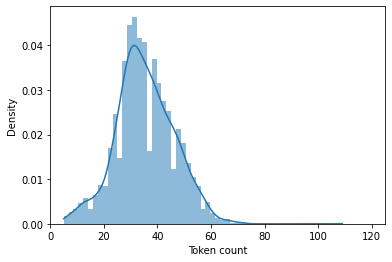

In [99]:
# mencari max_length menggunakan distribusi token dari dataset

import seaborn as sns

token_lens = []

for txt in dataset.tweet:
  tokens = bert_tokenizer.encode(txt)
  token_lens.append(len(tokens))

sns.histplot(token_lens, kde=True, stat='density', linewidth=0)
plt.xlim([0, 125]);
plt.xlabel('Token count');

In [100]:
# dapat dilihat dari penyebaran tokennya berada di nilai 110

MAX_LEN = 110 

In [101]:
# fungsi untuk menggabungkan langkah tokenisasi dan menambahkan special tokens untuk keseluruhan data

def convert_example_to_feature(sentence):  
  return bert_tokenizer.encode_plus(
      sentence, 
      add_special_tokens = True, 
      padding = 'max_length',
      truncation = 'longest_first',
      max_length = MAX_LEN, 
      return_attention_mask = True, 
      return_token_type_ids=True
    )

In [102]:
#  fungsi untuk memetakan input hasil input formatting 
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      "input_ids": input_ids,               # Sebagai token embedding
      "token_type_ids": token_type_ids,     # Sebagai segment embedding
      "attention_mask": attention_masks,    # Sebagai filter informasi mana yang kalkulasi oleh model
  }, label

In [103]:
import tensorflow as tf

# fungsi untuk iterasi pada setiap kalimat pada keseluruhan data
def encode(data):
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []
    
  for sentence, label in dataset.to_numpy():

    bert_input = convert_example_to_feature(sentence)
  
    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    label_list.append([label])

  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)

In [104]:
# tentukan nilai hyperparamter untuk fine-tuning

EPOCHS = 10 
BATCH_SIZE = 16
LEARNING_RATE = 5e-5

In [105]:
# Lakukan input formatting menggunakan fungsi sebelumnya pada data keseluruhan data

train_encoded = encode(df_train).batch(BATCH_SIZE) # digunakan untuk training
test_encoded = encode(df_test).batch(BATCH_SIZE) # digunakan untuk evaluating
val_encoded = encode(df_val).batch(BATCH_SIZE)   # digunakan untuk validasi

## Load Pre-Trained Model

Pada bagian ini kita akan memanggil pretrained model BERT. Untuk optimizernya kita akan menggunakan Adam dengan metric accuracy dan loss crossentropy. Kemudian model ini kita compile dan siap untuk di training.

In [106]:
# import model dari transformers

from transformers import TFBertForSequenceClassification

# load model dari library dengan jumlah label 5
bert_model = TFBertForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL, num_labels=5)

Downloading:   0%|          | 0.00/656M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [107]:
# menentukan optimizer yang digunakan yaitu adam dengan learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

# loss function menggunakan sparse categorical cross entropy
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

# model di compile
bert_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

## Fine Tuning

Pada proses ini dilakukan training pada model BERT sesuai dengan 10 epoch dan batch size yang telah di diklarasikan sebelumnya. Hasil dari training ini menunjukkan akurasi 98.16% dan loss 0.0663, sementara untuk akurasi validasinya 97.59% dan validasi lossnya 0.0892. Hasil training ini kita plot untuk memastikan model yang kita buat tidak mengalami overfitting.

In [108]:
# proses training

%%time
bert_history = bert_model.fit(train_encoded, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=val_encoded)

Epoch 1/10
276/276 [==============================] - 165s 524ms/step - loss: 0.9631 - accuracy: 0.6342 - val_loss: 0.6882 - val_accuracy: 0.8066
Epoch 2/10
276/276 [==============================] - 145s 524ms/step - loss: 0.5981 - accuracy: 0.7973 - val_loss: 0.5168 - val_accuracy: 0.8357
Epoch 3/10
276/276 [==============================] - 144s 524ms/step - loss: 0.3580 - accuracy: 0.8843 - val_loss: 0.3425 - val_accuracy: 0.8878
Epoch 4/10
276/276 [==============================] - 144s 523ms/step - loss: 0.2426 - accuracy: 0.9223 - val_loss: 0.1669 - val_accuracy: 0.9518
Epoch 5/10
276/276 [==============================] - 144s 522ms/step - loss: 0.1858 - accuracy: 0.9409 - val_loss: 0.1169 - val_accuracy: 0.9648
Epoch 6/10
276/276 [==============================] - 144s 522ms/step - loss: 0.1074 - accuracy: 0.9673 - val_loss: 0.1248 - val_accuracy: 0.9609
Epoch 7/10
276/276 [==============================] - 144s 522ms/step - loss: 0.1103 - accuracy: 0.9664 - val_loss: 0.0719 -

In [109]:
# fungsi untuk plotting hasil training
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

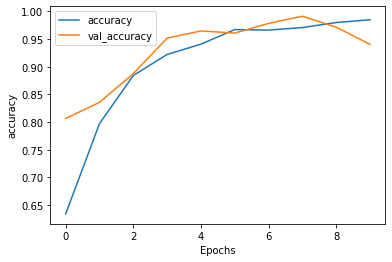

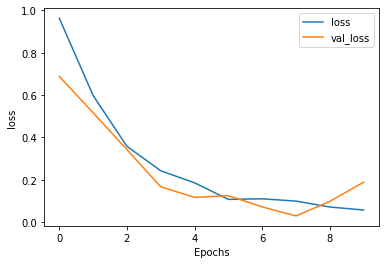

In [110]:
# plot untuk akurasi dan loss

plot_graphs(bert_history, 'accuracy')
plot_graphs(bert_history, 'loss')

In [111]:
# hasil akurasi dan loss untuk setiap epochnya dalam bentuk tabel

print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(EPOCHS):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, bert_history.history['accuracy'][i], bert_history.history['loss'][i], bert_history.history['val_accuracy'][i], bert_history.history['val_loss'][i]))


Epoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss
       1   0.634174 	   0.963076 	   0.806635 	   0.688223
       2   0.797319 	   0.598148 	   0.835719 	   0.516784
       3   0.884344 	   0.358001 	   0.887753 	   0.342539
       4   0.922290 	   0.242570 	   0.951829 	   0.166939
       5   0.940922 	   0.185806 	   0.964781 	   0.116878
       6   0.967280 	   0.107384 	   0.960918 	   0.124849
       7   0.966371 	   0.110256 	   0.978414 	   0.071912
       8   0.970916 	   0.099376 	   0.991366 	   0.029393
       9   0.980005 	   0.071403 	   0.971597 	   0.098109
      10   0.985003 	   0.057281 	   0.940695 	   0.188576


In [112]:
# model bert di save

bert_model.save_weights('bert-model.h5')

## Evaluate

Pada bagian ini akan di evaluasi model yang sudah dilakukan dan akan kita lihat untuk hasil akurasi testnya. Hasil dari akurasi tes ini menunjukkan bahwa model yang dibuat memiliki akurasi 97.59% dengan loss 0.0892.

In [113]:
# proses evaluasi

score = bert_model.evaluate(test_encoded)

print("Test Accuracy:", score[1])

276/276 [==============================] - 38s 137ms/step - loss: 0.1886 - accuracy: 0.9407
Test Accuracy: 0.9406952857971191


In [114]:
# proses prediksi

predicted_raw = bert_model.predict(test_encoded)

In [115]:
y_pred = np.argmax(predicted_raw['logits'], axis=1)
y_true = np.array(df_test['label'])

In [116]:
y_pred

array([0, 0, 1, ..., 0, 1, 2])

In [117]:
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report

#accuracy_score(y_true, y_pred)

In [118]:
#confusion_matrix(y_true, y_pred)

In [119]:
#print(classification_report(y_true, y_pred))

# Word2Vec

Untuk perbandingan model deep learning disini saya juga akan menambahkan beberapa metode lainnya yang memanfaatkan word embedding yaitu Word2Vec. Pada model ini adalah model deep learning yang tidak memanfaatkan pretrained model sehingga hasilnya dapat dipastikan akan lebih kecil jika dibandingkan dengan menggunakan pretrained model.

Pada bagian ini kita akan deklarasikan Word2Vec yang akan digunakan pada model-model selanjutnya.

In [120]:
# import library gensim
import gensim

gensim.__version__

'3.6.0'

In [121]:
# proses teknisasi pada seluruh dataset

def tokenization(text):
  text = re.split('\W+', text)
  return text

sentences = dataset['tweet'].apply(lambda x: tokenization(x.lower()))
sentences

0       [soal, jln, jatibarupolisi, tdk, bs, gertak, g...
1       [sesama, cewe, lho, kayaknya, harusnya, bisa, ...
2       [kepingin, gudeg, mbarek, bu, hj, amad, foto, ...
3       [jln, jatibarubagian, dari, wilayah, tn, abang...
4       [sharing, pengalaman, aja, kemarin, jam, batal...
                              ...                        
4396    [tahukah, kamu, bahwa, saat, itu, papa, memeja...
4397    [sulitnya, menetapkan, calon, wapresnya, jokow...
4398    [masa, depannya, nggak, jelas, lha, iya, giman...
4399    [username, dulu, beneran, ada, mahasiswa, tekn...
4400    [ya, allah, hanya, engkau, yang, mengetahui, r...
Name: tweet, Length: 4401, dtype: object

In [122]:
# parameter training untuk Word2Vec

EMBEDDING_SIZE = 100    # Dimensi word vektor / neuron pada projection (hidden) layer
WINDOW_SIZE = 5         # Window size. Jarak maksimum antara kata saat ini dan yang diprediksi dalam sebuah
MIN_WORD  = 1           # Model akan mengabaikan semua kata dengan frekuensi total lebih rendah dari ini (opsional)
EPOCH = 10              # Jumlah iterasi (epoch).
SG = 1                  # Strategi algoritma pelatihan: 1 untuk skip-gram, 0 untuk CBOW
NEGATIVE = 5            # Negative sampling. Jika 0, negative sampling tidak digunakan

In [123]:
%%time 

# training Word2Vec
from gensim.models import Word2Vec, FastText, KeyedVectors

model_word2vec = Word2Vec(sentences, size=EMBEDDING_SIZE, sg=SG, min_count=MIN_WORD, window=WINDOW_SIZE, negative=NEGATIVE, iter=EPOCH)

CPU times: user 12.6 s, sys: 64.4 ms, total: 12.6 s
Wall time: 8.11 s


In [124]:
# model Word2Vec di save
model_word2vec.save('myvec-word2vec-100.model')

In [125]:
# Word2Vec disimpan sebagai wordvectors
word2vec_word_vectors = model_word2vec.wv
word2vec_word_vectors.save('myvec-word2vec-100.wordvectors')

In [126]:
# Kata-kata diplot vektornya
word_list = ['aneh', 'lancar', 'hati', 'iri', 'happy', 'sayang', 'sakit', 'akal', 'maling', 'alhamdulillah', 'keren']

# daftar vektor dari kata-kata tersebut
word_vectors = np.array([model_word2vec.wv[w] for w in word_list])
print(word_vectors)

[[ 0.0765884  -0.12027879 -0.1431606  ...  0.03215909  0.46665838
  -0.14133833]
 [ 0.15802908 -0.08549252 -0.23665196 ...  0.22379948  0.18565045
   0.11897136]
 [ 0.05084118 -0.24430858 -0.2549041  ... -0.1380682   0.22576374
   0.46433026]
 ...
 [ 0.05463753 -0.09889069 -0.13371065 ...  0.09922272  0.36195716
  -0.10491427]
 [ 0.23644507 -0.06190684 -0.13224225 ...  0.22089337  0.2805922
   0.11931554]
 [ 0.08555055 -0.01995077 -0.22165227 ...  0.21241654  0.40282887
  -0.20093815]]


In [127]:
# reduksi dimensi vektor ke 2D menggunakan PCA
from sklearn.decomposition import PCA, KernelPCA

dimred = PCA(n_components=2, copy=False, whiten=True)
red_word_vectors = dimred.fit_transform(word_vectors)

In [128]:
# vektor hasil PCA (dari 5 dimensi menjadi 2 dimensi)
red_word_vectors

array([[ 0.06388001, -0.3673151 ],
       [-0.7867926 , -0.33449665],
       [ 1.1259744 ,  0.3801112 ],
       [ 0.07135718, -0.5408956 ],
       [-0.71490425,  0.6289253 ],
       [ 0.09000073,  2.7461717 ],
       [ 2.360762  , -0.58050084],
       [-0.06219121, -0.6784074 ],
       [-0.20071256, -0.4901539 ],
       [-1.1624961 , -0.5402163 ],
       [-0.784878  , -0.22322223]], dtype=float32)

In [129]:
# fungsi untuk melakukan ploting dari vektor kata menggunakan word2vec

def plot(datas, labels, fc='yellow'):
  plt.subplots_adjust(bottom = 0.1)
  plt.scatter(datas[:, 0], datas[:, 1], marker='o')

  for label, x, y in zip(labels, datas[:, 0], datas[:, 1]):
    plt.annotate(label, \
                 xy=(x, y), xytext=(-15, 15), \
                 textcoords='offset points', ha='right', va='bottom', \
                 bbox=dict(boxstyle='round,pad=0.3', fc=fc, alpha=0.5), \
                 arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
  plt.show()

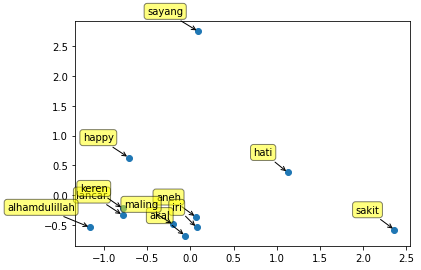

In [130]:
# memunculkan plot

plot(red_word_vectors, word_list)

# LSTM

Pada bagian ini digunakan model Long Short Term Memory, pertama akan kita akan mencari terlebih dahulu beberapa parameter yang diperlukan untuk menggunakan model LSTM. Selanjutnya kita deklrasikan model dan arsitekturnya, kemudian kita training dengan 10 epoch hasilnya ini kita ploting dalam bentuk grafik untuk melihat loss dan akurasinya. Setelah selesai kemudian kita akan evaluasi menggunakan model.evaluate dan classification report. Untuk model ini sayangnya tidak menunjukkan hasil yang baik dengan akurasi hanya sekitar 23% dengan loss yang sangat tinggi. Ini kemungkinan terjadi karena dari saya sendiri yang kurang tepat dalam menyusun model LSTM ini.

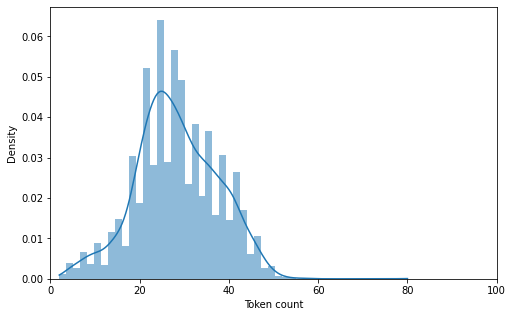

In [131]:
# menentukan max_length

token_lens = []

for text in dataset['tweet']:
    tokens = text.split()
    token_lens.append(len(tokens))

plt.figure(figsize=(8, 5))
sns.histplot(token_lens, kde=True, stat='density', linewidth=0)
plt.xlim([0, 100]);
plt.xlabel('Token count');

In [132]:
# dari grafik dapat dilihat bahwa penyebaran token berada di nilai 80

MAX_SEQ_LENGTH = 80

In [133]:
#import library untuk tokenizer

from keras.preprocessing.text import Tokenizer

In [134]:
NUM_WORDS = 100       # Frekuensi kemunculan kata
OOV_TOKEN = '<unk>'   # Token khusus untuk mengganti kata yang tidak terdaftar dalam dictionary

tokenizer = Tokenizer(num_words=NUM_WORDS, oov_token=OOV_TOKEN, lower=True, split=' ')
tokenizer.fit_on_texts(dataset['tweet'])

# token padding untuk menyamakan ukuran dimensi embedding layer
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

WV_DICTIONARY = tokenizer.word_index

WV_DICTIONARY_SIZE = len(WV_DICTIONARY)
print(WV_DICTIONARY_SIZE) # lihat jumlah kata unik pada dictionary yang dihasilkan

19426


In [135]:
# dictionary hasil tokenisasi
WV_DICTIONARY

{'<unk>': 1,
 'username': 2,
 'dan': 3,
 'yg': 4,
 'yang': 5,
 'di': 6,
 'aku': 7,
 'ini': 8,
 'itu': 9,
 'ada': 10,
 'ya': 11,
 'sama': 12,
 'ga': 13,
 'bisa': 14,
 'tapi': 15,
 'saya': 16,
 'aja': 17,
 'dia': 18,
 'url': 19,
 'kita': 20,
 'ke': 21,
 'mau': 22,
 'kalo': 23,
 'orang': 24,
 'gue': 25,
 'lagi': 26,
 'kamu': 27,
 'jadi': 28,
 'dari': 29,
 'udah': 30,
 'juga': 31,
 'gak': 32,
 'apa': 33,
 'sayang': 34,
 'dengan': 35,
 'untuk': 36,
 'cinta': 37,
 'takut': 38,
 'tidak': 39,
 'buat': 40,
 'banget': 41,
 'sudah': 42,
 'sih': 43,
 'karena': 44,
 'masih': 45,
 'nya': 46,
 'lebih': 47,
 'akan': 48,
 'selalu': 49,
 'banyak': 50,
 'mereka': 51,
 'tak': 52,
 'gitu': 53,
 'tau': 54,
 'kalau': 55,
 'semua': 56,
 'gw': 57,
 'tp': 58,
 'pas': 59,
 'ku': 60,
 'atau': 61,
 'terus': 62,
 'pernah': 63,
 'kan': 64,
 'suka': 65,
 'hari': 66,
 'harus': 67,
 'bukan': 68,
 'baru': 69,
 'dulu': 70,
 'bikin': 71,
 'cuma': 72,
 'sendiri': 73,
 'lain': 74,
 'jangan': 75,
 'punya': 76,
 'pada': 77,
 

In [136]:
# mengubah token hasil tokenisasi menjadi urutan bilangan int berdasarkan index dictionary
data_seq = tokenizer.texts_to_sequences(dataset['tweet'])

In [137]:
# hasil setelah di ubah menjadi sequences
print(dataset['tweet'][10])
print(data_seq[10])

betul min rakyat indonesia sekarang harapan nya tinggal sama tni saja kalau yang lain lihat saja sudah jelas penyerangan ke kantor media katanya tidak ada unsur pidananya sudah jelas menghina presiden indonesia yang sah cuma lucu lucu an saja tni url
[1, 1, 1, 1, 97, 1, 46, 1, 12, 1, 95, 55, 5, 74, 1, 95, 42, 1, 1, 21, 1, 1, 1, 39, 10, 1, 1, 42, 1, 1, 1, 1, 5, 1, 72, 1, 1, 1, 95, 1, 19]


In [138]:
# mengubah sequence menjadi array
# import library

from keras.preprocessing.sequence import pad_sequences

In [139]:
PADDING = 'post'        # berikan padding untuk setiap sequences.
TRUNCATING = 'post'     # menghapus token dari sequences yang lebih besar dari max_lenght

data_pad = pad_sequences(data_seq, maxlen=MAX_SEQ_LENGTH, padding=PADDING, truncating=TRUNCATING)

In [140]:
print(dataset['tweet'][10])
print('panjang {}'.format(len(sentences[10])))
print(data_seq[10])
print(data_pad[10])

betul min rakyat indonesia sekarang harapan nya tinggal sama tni saja kalau yang lain lihat saja sudah jelas penyerangan ke kantor media katanya tidak ada unsur pidananya sudah jelas menghina presiden indonesia yang sah cuma lucu lucu an saja tni url
panjang 41
[1, 1, 1, 1, 97, 1, 46, 1, 12, 1, 95, 55, 5, 74, 1, 95, 42, 1, 1, 21, 1, 1, 1, 39, 10, 1, 1, 42, 1, 1, 1, 1, 5, 1, 72, 1, 1, 1, 95, 1, 19]
[ 1  1  1  1 97  1 46  1 12  1 95 55  5 74  1 95 42  1  1 21  1  1  1 39
 10  1  1 42  1  1  1  1  5  1 72  1  1  1 95  1 19  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0]


In [141]:
from tensorflow.keras.utils import to_categorical

Y = to_categorical(dataset['label'], num_classes=len(dataset['label'].unique()))  # Lakukan one-hot encoding pada label (y)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(data_pad, Y, test_size=0.20)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3520, 80), (881, 80), (3520, 5), (881, 5))

In [143]:
X_train.shape

(3520, 80)

In [144]:
# deklarasi model LSTM

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense

model_LSTM = Sequential()
model_LSTM.add(Embedding(                                           # Buat embedding layer yang menerima panjang dictionary hasil Tokenisasi
    input_dim = WV_DICTIONARY_SIZE,                                 # banyaknya token 
    input_length = MAX_SEQ_LENGTH,                                  #60 kata per kalimat
    output_dim = 64))      
model_LSTM.add(LSTM(64))                                            # Tambahkan satu layer LSTM
model_LSTM.add(Dropout(0.5))                             
model_LSTM.add(Dense(5, activation='softmax'))

In [145]:
# Compile model
model_LSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [146]:
# proses training

%%time

EPOCH = 10
BATCH_SIZE = 16

history_LSTM = model_LSTM.fit(X_train, y_train, epochs=EPOCH, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

Epoch 1/10
220/220 [==============================] - 6s 10ms/step - loss: 1.5894 - accuracy: 0.2435 - val_loss: 1.5906 - val_accuracy: 0.2406
Epoch 2/10
220/220 [==============================] - 2s 7ms/step - loss: 1.5865 - accuracy: 0.2509 - val_loss: 1.5922 - val_accuracy: 0.2406
Epoch 3/10
220/220 [==============================] - 2s 7ms/step - loss: 1.5879 - accuracy: 0.2452 - val_loss: 1.5879 - val_accuracy: 0.2406
Epoch 4/10
220/220 [==============================] - 2s 7ms/step - loss: 1.5858 - accuracy: 0.2398 - val_loss: 1.5887 - val_accuracy: 0.2406
Epoch 5/10
220/220 [==============================] - 2s 7ms/step - loss: 1.5864 - accuracy: 0.2418 - val_loss: 1.5875 - val_accuracy: 0.2406
Epoch 6/10
220/220 [==============================] - 2s 7ms/step - loss: 1.5839 - accuracy: 0.2463 - val_loss: 1.5921 - val_accuracy: 0.2406
Epoch 7/10
220/220 [==============================] - 2s 7ms/step - loss: 1.5853 - accuracy: 0.2449 - val_loss: 1.5902 - val_accuracy: 0.2179
Epoch

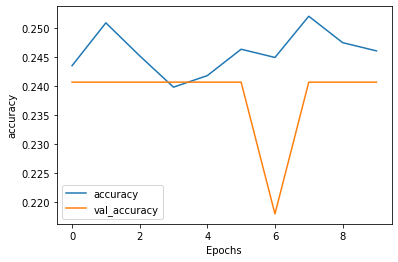

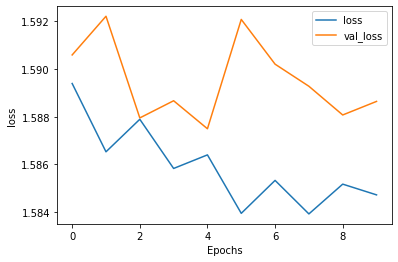

In [148]:
plot_graphs(history_LSTM, 'accuracy')
plot_graphs(history_LSTM, 'loss')

In [149]:
# hasil akurasi dan loss pada tiap epoch

print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(EPOCH):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history_LSTM.history['accuracy'][i], history_LSTM.history['loss'][i], history_LSTM.history['val_accuracy'][i], history_LSTM.history['val_loss'][i]))


Epoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss
       1   0.243466 	   1.589393 	   0.240636 	   1.590592
       2   0.250852 	   1.586525 	   0.240636 	   1.592217
       3   0.245170 	   1.587891 	   0.240636 	   1.587948
       4   0.239773 	   1.585826 	   0.240636 	   1.588669
       5   0.241761 	   1.586396 	   0.240636 	   1.587493
       6   0.246307 	   1.583942 	   0.240636 	   1.592083
       7   0.244886 	   1.585325 	   0.217934 	   1.590205
       8   0.251989 	   1.583917 	   0.240636 	   1.589277
       9   0.247443 	   1.585168 	   0.240636 	   1.588072
      10   0.246023 	   1.584717 	   0.240636 	   1.588641


In [150]:
# prediksi pada data uji
y_pred = np.argmax(model_LSTM.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# evaluasi
loss, accuracy = model_LSTM.evaluate(X_test, y_test)

28/28 [==============================] - 0s 4ms/step - loss: 1.5886 - accuracy: 0.2406


In [151]:
# evaluasi dengan classification report
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       1.00      0.24      0.39       881
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.24       881
   macro avg       0.20      0.05      0.08       881
weighted avg       1.00      0.24      0.39       881



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# LSTM + Word2Vec

Model selanjutnya yang digunakan adalah Long Short Term Memory yang ditambahkan dengan Word2Vec. Pertama akan kita deklrasikan model dan arsitekturnya yang ditambahkan dengan Word2Vec, kemudian kita training dengan 10 epoch hasilnya ini kita ploting dalam bentuk grafik untuk melihat loss dan akurasinya. Setelah selesai kemudian kita akan evaluasi menggunakan model.evaluate dan classification report. Untuk model ini sayangnya tidak menunjukkan hasil yang baik dengan akurasi hanya sekitar ___% dengan loss yang sangat tinggi. Ini kemungkinan terjadi karena dari saya sendiri yang kurang tepat dalam menyusun model LSTM ini.

In [155]:
# Load word2vec yang telah kita simpan
from gensim.models import KeyedVectors

my_word2vec = KeyedVectors.load('myvec-word2vec-100.wordvectors', mmap='r')
my_word2vec_vocab = my_word2vec.wv.vocab     

VOCAB_SIZE = len(my_word2vec_vocab)
EMBEDDING_SIZE = my_word2vec.vector_size

print(VOCAB_SIZE)
print(EMBEDDING_SIZE)

19435
100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """


In [156]:
word2vec_dict = {}

for word in my_word2vec_vocab:
    word2vec_dict[word] = my_word2vec.wv.get_vector(word)   
    
print('The numbers of key-value pairs: ', len(word2vec_dict)) # Harus sama dengan ukuran vocab word2vec

The numbers of key-value pairs:  19435


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


In [157]:
EMBEDDING_MATRIX = np.zeros(shape=(WV_DICTIONARY_SIZE, EMBEDDING_SIZE))

for word, i in tokenizer.word_index.items():
  embed_vector = word2vec_dict.get(word)
  if embed_vector is not None:               # Word is in the vocabulary learned by the w2v model
    EMBEDDING_MATRIX[i] = embed_vector

In [160]:
# deklarasi arsitektur dan model

from keras.models import Sequential
from tensorflow.keras.initializers import Constant

model_LSTM_w2v = Sequential()
model_LSTM_w2v.add(Embedding(
    input_dim = WV_DICTIONARY_SIZE,
    output_dim = EMBEDDING_SIZE,
    input_length = MAX_SEQ_LENGTH,
    trainable = True,
    embeddings_initializer = Constant(EMBEDDING_MATRIX)))
model_LSTM_w2v.add(LSTM(64))
model_LSTM.add(Dropout(0.5))  
model_LSTM_w2v.add(Dense(5, activation='softmax'))

In [161]:
# model dicompile
model_LSTM_w2v.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [162]:
# dilakukan training dengan 10 epoch

%%time

EPOCH = 10
BATCH_SIZE = 16

history_LSTM_w2v = model_LSTM_w2v.fit(X_train, y_train, epochs=EPOCH, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

Epoch 1/10
220/220 [==============================] - 4s 10ms/step - loss: 1.5873 - accuracy: 0.2474 - val_loss: 1.5926 - val_accuracy: 0.2406
Epoch 2/10
220/220 [==============================] - 2s 8ms/step - loss: 1.5849 - accuracy: 0.2415 - val_loss: 1.5908 - val_accuracy: 0.2406
Epoch 3/10
220/220 [==============================] - 2s 8ms/step - loss: 1.5851 - accuracy: 0.2526 - val_loss: 1.5886 - val_accuracy: 0.2406
Epoch 4/10
220/220 [==============================] - 2s 8ms/step - loss: 1.5843 - accuracy: 0.2526 - val_loss: 1.5888 - val_accuracy: 0.2406
Epoch 5/10
220/220 [==============================] - 2s 8ms/step - loss: 1.5916 - accuracy: 0.2457 - val_loss: 1.5891 - val_accuracy: 0.2406
Epoch 6/10
220/220 [==============================] - 2s 8ms/step - loss: 1.5816 - accuracy: 0.2520 - val_loss: 1.5549 - val_accuracy: 0.2531
Epoch 7/10
220/220 [==============================] - 2s 8ms/step - loss: 1.4689 - accuracy: 0.3403 - val_loss: 1.4521 - val_accuracy: 0.3473
Epoch

In [173]:
# hasil akurasi dan loss pada tiap epoch

print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(EPOCH):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history_LSTM_w2v.history['accuracy'][i], history_LSTM.history['loss'][i], history_LSTM.history['val_accuracy'][i], history_LSTM.history['val_loss'][i]))


Epoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss
       1   0.247443 	   1.589393 	   0.240636 	   1.590592
       2   0.241477 	   1.586525 	   0.240636 	   1.592217
       3   0.252557 	   1.587891 	   0.240636 	   1.587948
       4   0.252557 	   1.585826 	   0.240636 	   1.588669
       5   0.245739 	   1.586396 	   0.240636 	   1.587493
       6   0.251989 	   1.583942 	   0.240636 	   1.592083
       7   0.340341 	   1.585325 	   0.217934 	   1.590205
       8   0.334659 	   1.583917 	   0.240636 	   1.589277
       9   0.283807 	   1.585168 	   0.240636 	   1.588072
      10   0.273011 	   1.584717 	   0.240636 	   1.588641


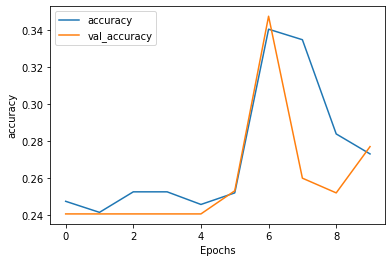

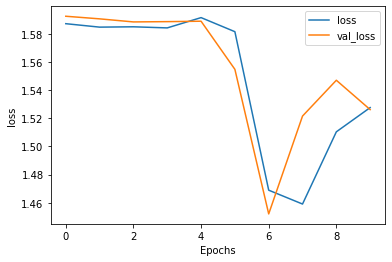

In [163]:
# plot grafik loss dan akurasi

plot_graphs(history_LSTM_w2v, 'accuracy')
plot_graphs(history_LSTM_w2v, 'loss')

In [164]:
# prediksi pada data uji
y_pred = np.argmax(model_LSTM_w2v.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

loss, accuracy = model_LSTM_w2v.evaluate(X_test, y_test)

28/28 [==============================] - 0s 5ms/step - loss: 1.5262 - accuracy: 0.2770


In [174]:
# evaluasi dengan classification report
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

           0       0.57      0.35      0.44       343
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.90      0.23      0.36       538

    accuracy                           0.28       881
   macro avg       0.29      0.12      0.16       881
weighted avg       0.77      0.28      0.39       881



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Predict

Dari seluruh model yang dibuat dapat dilihat bahwa hasil akurasi dengan menggunakan BERT fine-tuning menunjukkan hasil yang paling baik dari seluruh model yang dibuat. Oleh karena itu pada bagian ini dibuat sebuah sistem prediksi dengan memanfaatkan model BERT yang mampu kita input text secara langsung dan melihat bagaimana sistem klasifikasinya. 

In [165]:
# load hasil BERT fine-tuning
bert_load_model = TFBertForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL, num_labels=5)
bert_load_model.load_weights('bert-model.h5')

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [166]:
# masukan text atau tweet
input_text = 'Aku sayang dia'

# proses encode dari input text
input_text_tokenized = bert_tokenizer.encode(input_text,
                                             truncation=True,
                                             padding='max_length',
                                             return_tensors='tf')

Asking to pad to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no padding.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [167]:
# proses prediksi
bert_predict = bert_load_model(input_text_tokenized)
bert_output = tf.nn.softmax(bert_predict[0], axis=-1)         # Softmax function untuk mendapatkan hasil klasifikasi

In [168]:
sms_labels = ['Marah','Senang','Sedih', 'Takut', 'Cinta'] # label yang digunakan

label = tf.argmax(bert_output, axis=1)
label = label.numpy()

In [169]:
print(input_text, ':', sms_labels[label[0]]) #print hasilnya prediksi

Aku sayang dia : Cinta


# Deployment

Setelah membuat sistem prediksi sederhana disini saya juga memasukan sebuah deployment sederhana melalui aplikasi demo gradio. Disini kita bisa langsung memasukan model yang kita buat kemudian nantinya akan muncul sebuah link dimana disana kita bisa langsung memasukan text atau tweet dan nantinya sistem akan melakukan klasifikasi kemanakah termasuk text atau tweet tersebut.

In [170]:
# install gradio

!pip -q install gradio

     |████████████████████████████████| 5.3 MB 39.2 MB/s 
     |████████████████████████████████| 270 kB 46.3 MB/s 
     |████████████████████████████████| 84 kB 3.1 MB/s 
     |████████████████████████████████| 2.3 MB 54.8 MB/s 
     |████████████████████████████████| 84 kB 4.1 MB/s 
     |████████████████████████████████| 57 kB 5.9 MB/s 
     |████████████████████████████████| 55 kB 3.0 MB/s 
     |████████████████████████████████| 212 kB 69.3 MB/s 
     |████████████████████████████████| 112 kB 59.0 MB/s 
     |████████████████████████████████| 54 kB 3.5 MB/s 
     |████████████████████████████████| 63 kB 2.6 MB/s 
     |████████████████████████████████| 80 kB 10.3 MB/s 
     |████████████████████████████████| 68 kB 6.8 MB/s 
     |████████████████████████████████| 46 kB 4.4 MB/s 
     |████████████████████████████████| 856 kB 60.6 MB/s 
     |████████████████████████████████| 594 kB 66.4 MB/s 
     |████████████████████████████████| 4.0 MB 54.6 MB/s 


In [171]:
#import library gradio
import gradio as gr

# fungsi untuk prediksi emosi tweet
def emotion_prediction(tweet):
  input_text_tokenized = bert_tokenizer.encode(tweet,
                                             truncation=True,
                                             padding='max_length',
                                             return_tensors='tf')
  
  bert_predict = bert_load_model(input_text_tokenized)  #load model
  bert_output = tf.nn.softmax(bert_predict[0], axis=-1)

  tweet_labels = ['Marah','Senang','Sedih', 'Takut', 'Cinta'] #label
  
  label = tf.argmax(bert_output, axis=1)
  label = label.numpy()

  return tweet_labels[label[0]]

iface = gr.Interface(fn=emotion_prediction, inputs="text", outputs="text")

iface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://17881.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7fa873aa9d10>,
 'http://127.0.0.1:7860/',
 'https://17881.gradio.app')

# Perbandingan Hasil


Machine Learning | Akurasi | Validasi
-------------------|------------------|------------------
Multinomial NB | 61.63% | 61.69% 
Gausian NB | 53.57% | 54% 
KNN | 46.19% | 46.66% 
Logistic Regresion | 66.62% | 66.06% 
||

Deep Learing | Akurasi | Validasi
-------------------|------------------|------------------
LSTM | 25.37% | 23.04%
LSTM + Word2Vec | 27.30% | 27.70% 
BERT Fine Tuning | 98.16% | 97.59